## Importing Normalized Training Dataset

In [11]:
import pandas as pd

# getting normalized csv for training data
X_train_scaled = pd.read_csv("../dataset files/training/post_eda_train.csv")
X_train_scaled = X_train_scaled.drop(columns=['Unnamed: 0'])

# importing dataset targets
y_train_vector = pd.read_csv("../dataset files/training/madelon_train.labels", header=None, index_col=None)
y_train = y_train_vector[0].ravel()

X_train_scaled.head()
#y_train

0         1         2         3         4         5         6    7  \
0  0.560976  0.438356  0.588028  0.393939  0.255521  0.260870  0.566787  0.5   
1  0.512195  0.351598  0.316901  0.515152  0.681388  0.347826  0.693141  0.8   
2  0.609756  0.735160  0.454225  0.227273  0.242902  0.260870  0.389892  0.7   
3  0.439024  0.502283  0.492958  0.484848  0.391167  0.282609  0.299639  0.3   
4  0.536585  0.552511  0.556338  0.545455  0.299685  0.478261  0.245487  0.7   

          8         9  ...       490       491       492       493       494  \
0  0.424528  0.375000  ...  0.492958  0.529412  0.491429  0.449367  0.578947   
1  0.518868  0.291667  ...  0.394366  0.441176  0.548571  0.263291  0.587045   
2  0.471698  0.458333  ...  0.563380  0.529412  0.577143  0.658228  0.558704   
3  0.679245  0.437500  ...  0.591549  0.500000  0.474286  0.559494  0.348178   
4  0.537736  0.270833  ...  0.570423  0.470588  0.348571  0.386076  0.477733   

        495       496   497       498       499  
0  0.330798  0.558140  0.44  0.398577  0.516667  
1  0.334601  0.604651  0.57  0.523132  0.633333  
2  0.391635  0.534884  0.54  0.483986  0.527778  
3  0.269962  0.418605  0.47  0.466192  0.322222  
4  0.418251  0.558140  0.69  0.469751  0.600000  

[5 rows x 500 columns]

### Dataset already normalized, we can start modelling with KNN.

Best estimator: 41


<AxesSubplot:xlabel='estimators', ylabel='score'>

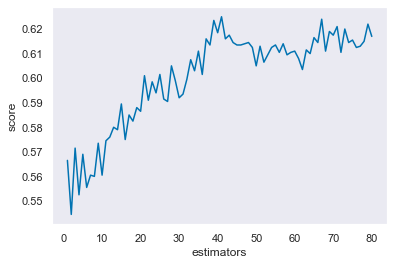

In [10]:
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict

# loop to find best number of estimators based on accuracy score
result = []
best_score = 0
best_estimator = 0

for i in range(1, 81):
    modelK = KNeighborsClassifier(n_neighbors=i)
    modelK.fit(X_train_scaled, y_train)
    # s = make_scorer(accuracy_score, pos_label=1)
    scores = cross_val_score(modelK, X_train_scaled, y_train, cv=3)
    if (scores.mean() > best_score):
        best_estimator = i
        best_score = scores.mean()
    result.append((i, scores.mean()))
    
# converting result into dataframe
estimators = np.array(result)[:,0]
score = np.array(result)[:,1]
d = {'estimators': estimators, 'score': score}
df_scores = pd.DataFrame(d)
print(f'Best estimator: {best_estimator}')

sns.set_theme(style="dark")
sns.set_palette("colorblind")
sns.lineplot(
        data=df_scores,
        x="estimators", 
        y="score"
    )

In [12]:
import seaborn as sns
import numpy as np
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict

modelK = KNeighborsClassifier(n_neighbors=41)
modelK.fit(X_train_scaled, y_train)
# s = make_scorer(recall_score, pos_label=1)
scores = cross_val_score(modelK, X_train_scaled, y_train, cv=3)
y_pred = cross_val_predict(modelK, X_train_scaled, y_train, cv=3)
print("accuracy_score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

accuracy_score: 0.62501 (+/- 0.02072)


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix

# printing confusion matrix
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[755 245]
 [505 495]]
              precision    recall  f1-score   support

          -1       0.60      0.76      0.67      1000
           1       0.67      0.49      0.57      1000

    accuracy                           0.62      2000
   macro avg       0.63      0.62      0.62      2000
weighted avg       0.63      0.62      0.62      2000

